##Image Difference Detection Model

Saving Dog_1.jpg to Dog_1.jpg
Saving Dog_3.jpg to Dog_3.jpg
SSIM Score: 0.4336


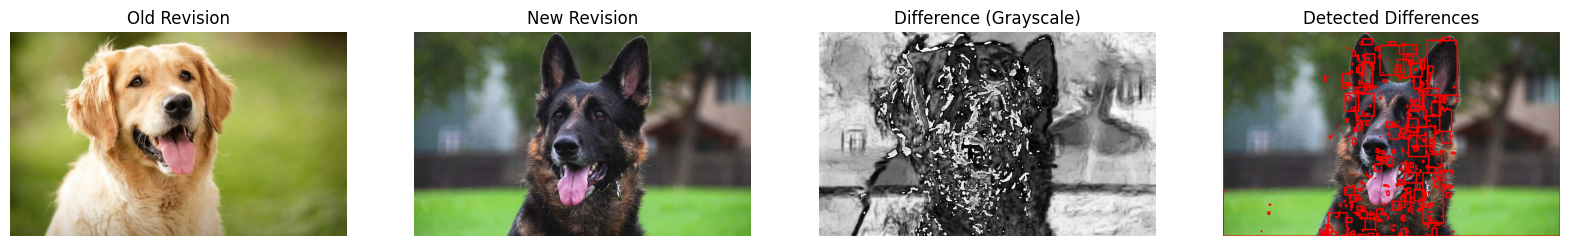

In [ ]:
# Import Necessary Libraries
import cv2
import numpy as np
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt
from google.colab import files

def upload_and_detect_differences():
    """
    Uploads images from local storage and detects differences between them.
    """
    # Upload images manually
    uploaded = files.upload()

    # Get the file names (first two uploaded files)
    image_paths = list(uploaded.keys())

    if len(image_paths) < 2:
        print("Error: Please upload two images to compare!")
        return

    image1_path = image_paths[0]
    image2_path = image_paths[1]

    # Load images
    image1 = cv2.imread(image1_path)
    image2 = cv2.imread(image2_path)

    if image1 is None or image2 is None:
        print("Error: Images not found or cannot be loaded.")
        return

    # Convert images to grayscale
    gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Compute Structural Similarity Index (SSIM)
    score, diff = ssim(gray1, gray2, full=True)
    print(f"SSIM Score: {score:.4f}")

    # Normalize difference image to range [0, 255]
    diff = (diff * 255).astype("uint8")

    # Apply thresholding to highlight differences
    _, thresh = cv2.threshold(diff, 50, 255, cv2.THRESH_BINARY)

    # Find contours of differences
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw bounding boxes around differences on the new image
    result_image = image2.copy()
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(result_image, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Plot original images and difference visualization
    fig, axes = plt.subplots(1, 4, figsize=(20, 6))
    axes[0].imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Old Revision")
    axes[0].axis("off")

    axes[1].imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))
    axes[1].set_title("New Revision")
    axes[1].axis("off")

    axes[2].imshow(diff, cmap="gray")
    axes[2].set_title("Difference (Grayscale)")
    axes[2].axis("off")

    axes[3].imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
    axes[3].set_title("Detected Differences")
    axes[3].axis("off")

    plt.show()

# Run the function
upload_and_detect_differences()
